In [1]:
import sys

sys.path.append("/home/ptbadia/code/tfg/tfg_ttcross")

In [2]:
import numpy as np
import numba as nb
import matplotlib.pyplot as plt
from tt_cross.src.functions import *
from tt_cross.src.dmrg_cross import *
from tt_cross.src.interpolators_1D import *

In [3]:
# grid_creation
num_var = 10
subdivision = 30
temp = [np.linspace(0.5, 2, subdivision) for _ in range(num_var)]
grid = np.array(temp)
grid

array([[0.5       , 0.55172414, 0.60344828, 0.65517241, 0.70689655,
        0.75862069, 0.81034483, 0.86206897, 0.9137931 , 0.96551724,
        1.01724138, 1.06896552, 1.12068966, 1.17241379, 1.22413793,
        1.27586207, 1.32758621, 1.37931034, 1.43103448, 1.48275862,
        1.53448276, 1.5862069 , 1.63793103, 1.68965517, 1.74137931,
        1.79310345, 1.84482759, 1.89655172, 1.94827586, 2.        ],
       [0.5       , 0.55172414, 0.60344828, 0.65517241, 0.70689655,
        0.75862069, 0.81034483, 0.86206897, 0.9137931 , 0.96551724,
        1.01724138, 1.06896552, 1.12068966, 1.17241379, 1.22413793,
        1.27586207, 1.32758621, 1.37931034, 1.43103448, 1.48275862,
        1.53448276, 1.5862069 , 1.63793103, 1.68965517, 1.74137931,
        1.79310345, 1.84482759, 1.89655172, 1.94827586, 2.        ],
       [0.5       , 0.55172414, 0.60344828, 0.65517241, 0.70689655,
        0.75862069, 0.81034483, 0.86206897, 0.9137931 , 0.96551724,
        1.01724138, 1.06896552, 1.12068966, 1.

In [8]:
ttrc_interpolator = ttrc(
    func=slater,
    num_variables=num_var,
    grid=grid,
    maxvol_tol=1,
    truncation_tol=1e-10,
    sweeps=5,
    initial_bond_guess=10,
)

In [9]:
for i in ttrc_interpolator.i:
    print(i.shape)

(1, 1)
(10, 1)
(10, 2)
(10, 3)
(10, 4)
(10, 5)
(10, 6)
(10, 7)
(10, 8)
(10, 9)
(10, 10)


In [10]:
for j in ttrc_interpolator.j:
    print(j.shape)

(10, 9)
(10, 8)
(10, 7)
(10, 6)
(10, 5)
(10, 4)
(10, 3)
(10, 2)
(10, 1)
(1, 1)


In [11]:
ttrc_interpolator.bonds

array([10, 10, 10, 10, 10, 10, 10, 10, 10])

In [12]:
for t in ttrc_interpolator.b:
    print(t.shape)

(1, 30, 10)
(10, 30, 10)
(10, 30, 10)
(10, 30, 10)
(10, 30, 10)
(10, 30, 10)
(10, 30, 10)
(10, 30, 10)
(10, 30, 10)
(10, 30, 1)


In [13]:
ttrc_interpolator.p[-1]

array([[1.]])

In [14]:
ttrc_interpolator.initial_sweep()

In [15]:
for i in range(1, num_var):
    a = ncon([ttrc_interpolator.b[i], ttrc_interpolator.b[i]], [[-1, 1, 2], [-2, 1, 2]])
    print(a)
    print("=============")

[[ 1.00000000e+00  5.55111512e-17 -1.21430643e-17  1.56125113e-17
   1.38777878e-17 -1.21430643e-16 -4.68375339e-17 -2.25514052e-17
   7.97972799e-17  7.97972799e-17]
 [ 5.55111512e-17  1.00000000e+00 -4.16333634e-17 -5.55111512e-17
   1.38777878e-17  2.08166817e-17  6.93889390e-18  0.00000000e+00
  -3.46944695e-18  4.16333634e-17]
 [-1.21430643e-17 -4.16333634e-17  1.00000000e+00  5.55111512e-17
   9.71445147e-17  4.16333634e-17  4.16333634e-17  6.93889390e-18
   2.16840434e-18 -3.46944695e-17]
 [ 1.56125113e-17 -5.55111512e-17  5.55111512e-17  1.00000000e+00
  -6.93889390e-18  8.32667268e-17 -4.16333634e-17  1.38777878e-17
   2.42861287e-17  1.38777878e-16]
 [ 1.38777878e-17  1.38777878e-17  9.71445147e-17 -6.93889390e-18
   1.00000000e+00 -1.11022302e-16  0.00000000e+00 -2.77555756e-17
   1.24900090e-16 -8.32667268e-17]
 [-1.21430643e-16  2.08166817e-17  4.16333634e-17  8.32667268e-17
  -1.11022302e-16  1.00000000e+00  1.11022302e-16 -2.77555756e-17
  -3.46944695e-17  2.08166817e-17

In [16]:
for site in range(num_var - 1):
    ttrc_interpolator.left_right_update(site)

In [17]:
for p in ttrc_interpolator.p:
    print(p.shape)

(1, 1)
(6, 6)
(7, 7)
(7, 7)
(8, 8)
(9, 9)
(9, 9)
(8, 8)
(9, 9)
(7, 7)
(1, 1)


In [18]:
for b in ttrc_interpolator.b:
    print(b.shape)

(1, 30, 6)
(6, 30, 7)
(7, 30, 7)
(7, 30, 8)
(8, 30, 9)
(9, 30, 9)
(9, 30, 8)
(8, 30, 9)
(9, 30, 7)
(7, 30, 1)


In [19]:
for site in range(num_var - 2, -1, -1):
    ttrc_interpolator.right_left_update(site)

In [20]:
for p in ttrc_interpolator.p:
    print(p.shape)

(1, 1)
(6, 6)
(7, 7)
(7, 7)
(7, 7)
(8, 8)
(9, 9)
(10, 10)
(9, 9)
(7, 7)
(1, 1)


In [21]:
ttrc_interpolator.bonds

array([ 6,  7,  7,  7,  8,  9, 10,  9,  7])

In [23]:
ttrc_interpolator = ttrc(
    func=slater,
    num_variables=num_var,
    grid=grid,
    maxvol_tol=1,
    truncation_tol=1e-10,
    sweeps=5,
    initial_bond_guess=10,
)

mps_ttrc = ttrc_interpolator.run()

Sweep 1
Sweep 2
Sweep 3
Sweep 4
Sweep 5


In [24]:
for site in range(num_var - 1):
    print(ttrc_interpolator.i[site + 1].shape)
    print(ttrc_interpolator.j[site].shape)
    print("==========")

(6, 1)
(6, 9)
(7, 2)
(7, 8)
(7, 3)
(7, 7)
(7, 4)
(7, 6)
(8, 5)
(8, 5)
(9, 6)
(9, 4)
(10, 7)
(10, 3)
(9, 8)
(9, 2)
(7, 9)
(7, 1)


In [25]:
for t in mps_ttrc:
    print(t.shape)

(1, 30, 6)
(6, 6)
(6, 30, 7)
(7, 7)
(7, 30, 7)
(7, 7)
(7, 30, 7)
(7, 7)
(7, 30, 8)
(8, 8)
(8, 30, 9)
(9, 9)
(9, 30, 10)
(10, 10)
(10, 30, 9)
(9, 9)
(9, 30, 7)
(7, 7)
(7, 30, 1)


# 1-D Interpolator

In [26]:
def custom_func(x):
    B = 2 ** (-30)
    return np.cos(x / B) * np.cos(x / (4 * np.sqrt(5) * B)) * np.exp(-(x**2)) + 2 * np.exp(-x)

In [27]:
interval = [0, 2 ** (-23)]
d = 15

In [28]:
test_interpolator = ttrc_one_dim_func_interpolator(
    func=custom_func,
    interval=interval,
    d=15,
    complex_function=False,
)

In [29]:
test_interpolator.interpolate(
    max_bond=10,
    maxvol_tol=1.0001,
    truncation_tol=1e-10,
    sweeps=10,
)

Sweep 1
Sweep 2
Sweep 3
Sweep 4
Sweep 5
Sweep 6
Sweep 7
Sweep 8
Sweep 9
Sweep 10


In [30]:
for i in test_interpolator.interpolator.i:
    print(i.shape)

(1, 1)
(2, 1)
(4, 2)
(5, 3)
(5, 4)
(5, 5)
(5, 6)
(5, 7)
(5, 8)
(5, 9)
(5, 10)
(4, 11)
(4, 12)
(4, 13)
(2, 14)
(2, 15)


In [31]:
for j in test_interpolator.interpolator.j:
    print(j.shape)

(2, 14)
(4, 13)
(5, 12)
(5, 11)
(5, 10)
(5, 9)
(5, 8)
(5, 7)
(5, 6)
(5, 5)
(4, 4)
(4, 3)
(4, 2)
(2, 1)
(1, 1)


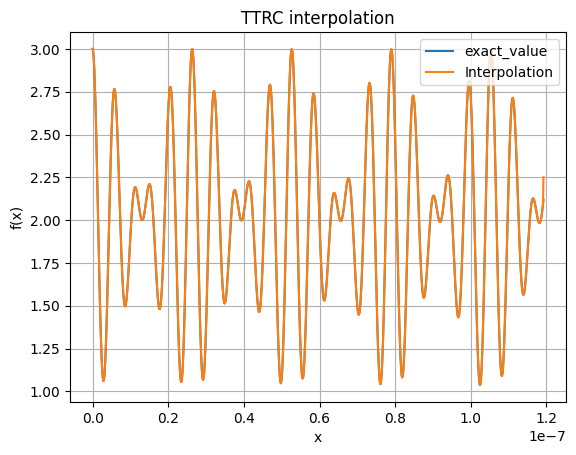

In [32]:
import matplotlib.pyplot as plt

x = np.linspace(0, 2 ** (-23), 1000)
y = custom_func(x)
interpolation = np.array([test_interpolator.eval(x_i) for x_i in x])

plt.plot(x, y, label="exact_value")
plt.plot(x, interpolation, label="Interpolation")

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("TTRC interpolation")
plt.legend()
plt.grid(True)
plt.show()

In [37]:
for i in range(test_interpolator.d - 1):
    print(np.concatenate((test_interpolator.interpolator.i[i + 1], test_interpolator.interpolator.j[i]), axis=1))
    print("==============================")

[[0.0 0.0 1.0 0.0 1.0 1.0 1.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0]
 [1.0 1.0 0.0 0.0 1.0 1.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 1.0]]
[[0.0 1.0 1.0 1.0 0.0 0.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 1.0]
 [1.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 1.0]
 [0.0 0.0 1.0 0.0 1.0 1.0 1.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0]
 [1.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0]]
[[0.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 1.0]
 [0.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0]
 [1.0 0.0 1.0 1.0 0.0 0.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 1.0]
 [0.0 0.0 1.0 0.0 1.0 1.0 1.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0]
 [1.0 1.0 0.0 1.0 1.0 1.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 1.0]]
[[0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 1.0]
 [0.0 0.0 1.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0]
 [0.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 1.0]
 [1.0 1.0 0.0 0.0 1.0 1.0 1.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0]
 [0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.

In [35]:
print(np.sum(np.abs(y - interpolation)))
# The tail of the function seems to have some artifacts...
print(np.sum(np.abs(y[:-50] - interpolation[:-50])))

0.5296511250719536
0.39156931691281316
